# Семинар 6
## Линейные модели

На этом семинаре мы наконец воспользуемся всеми теми математическими знаниями, которые мы приобрели на прошлых занятиях, чтобы понять как работают «под капотом»‎ популярные линейный алгоритмы.

В качестве данных мы воспользуемся «игрушечными»‎ датасетами, представленными в sklearn. Это отличные данные для того, чтобы тренироваться с новыми алгоритмами/фреймворками или проверять ваши гипотезы, поскольку на этих данных уже исзвестны лучшие метрики, которые можно получить определенными алгоритмами

#### Ресурсы

* https://proglib.io/p/linear-regression
* http://www.machinelearning.ru/wiki/images/5/50/MOMO17_Seminar2.pdf

### Загрузка игрушечных [датасетов](https://scikit-learn.org/stable/datasets/toy_dataset.html) из sklearn

In [1]:
# Импортируем из модуля datasets библиотеки sklearn функции для загрузки датасетов Iris и Diabetes
from sklearn.datasets import load_iris, load_diabetes

# импортируем функцию для разбиения данных на обучение и тест
from sklearn.model_selection import train_test_split

# Импортируем стандартный набор дата саентиста:)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Diabetes

In [2]:
# Загружаем данные при помощи функции load_diabetes
data = load_diabetes()

# load_diabetes возвращает словарь. Давайте посмотрим, что является ключами
print(data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [3]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [4]:
# Вытаскиваем признаки и метки
y_diabetes = data["target"]
X_diabetes = pd.DataFrame(data["data"], columns=data["feature_names"])

In [5]:
# Посмотрим на наши данные
X_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


У наших признаков следующее описание:

* age -- возраст в годах
* sex -- пол
* bmi -- индекс массы тела
* bp  -- среднее кровянное давление
* s1  -- общий холестерин сыворотки
* s2  -- липопротеины низкой плотности
* s3  -- липопротеины высокой плотности
* s4  -- общий холестерин
* s5  -- возможный логарифм уровня триглицеридов в сыворотке
* s6  -- уровень сахара в крови

**NOTE:** Все данные отскалированы

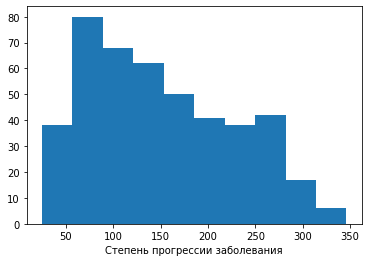

In [6]:
# Посмотрим как распределен наш таргетный столбце

plt.hist(y_diabetes)
plt.xlabel("Степень прогрессии заболевания")
plt.show()

Какая это задача?

In [7]:
# Разобьем данные на обучение и тест

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = (
    train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=2)
)

#### Iris

In [8]:
# Загружаем данные при помощи функции load_iris
data = load_iris()

# load_iris возвращает словарь. Давайте посмотрим, что является ключами
# print(...)

# Вытаскиваем признаки и метки
y_iris = data["target"]
X_iris = pd.DataFrame(data["data"], columns=data["feature_names"])

In [9]:
# Посмотрим на наши данные

X_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


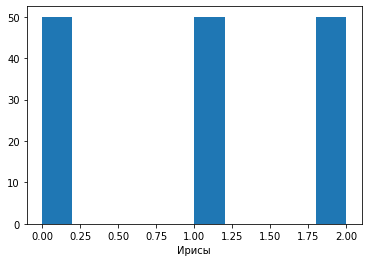

In [10]:
# Посмотрим на таргетный столбец

plt.hist(y_iris)
plt.xlabel("Ирисы")
plt.show()

Какая это задача?

In [11]:
# Для наглядности, нам было бы удобнее решать бинарную задачу c не идеально разделяющимися классами,
# поэтому предлагаем оставить только versicolor(1) и virginica(2)
condition = (y_iris == 1) | (y_iris == 2)
y_iris = y_iris[condition]
X_iris = X_iris[condition]

# Заменим метки класса 2 на 0
y_iris[y_iris == 2] = 0

Признаки являются замерами чашелистика и лепестков и нужны для определения сорта ириса.

In [12]:
# Разобьем данные на обучение и тест

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris,
    y_iris,
    stratify=y_iris,
    test_size=0.3,
    random_state=2
)

---

### Теоретическая преамбула

#### <u>**Решение систем уравнений при помощи матриц**</u>

Система линейных уравнений с $n$ уравнениями и $m$ переменными выглядит следующим образом:

\begin{equation*}
 \begin{cases}
   a_{11}x_1 + a_{12}x_2 + \ldots + a_{1m}x_m = b_1\\
   a_{21}x_1 + a_{22}x_2 + \ldots + a_{2m}x_m = b_2\\
   \ldots \\
   a_{n1}x_1 + a_{n2}x_2 + \ldots + a_{nm}x_m = b_n
 \end{cases}
\end{equation*}

Но также такую систему удобно представлять в матричной форме:

$$A\mathbf{x} = \mathbf{b}$$

Где матрица $A$ -- матрица коэффициентов исходного уравнения размера $n \times m$,

$\mathbf{x} = (x_1, x_2, \dots, x_m)^T, \mathbf{b} = (b_1, b_2, \dots, b_n)^T$

Решить такое уравнения, это значит как-то выразить вектор параметров $x$, то есть получить $x = \ldots$

Очень хотелось бы написать $x = A^{-1}\mathbf{b}$, однако для того, чтобы у матрицы существовала обратная ей, необходимо, чтобы она была хотя бы квадратной. Это будет достигаться в случае $n = m$, однако это, очевидно, выполняется не всегда. Кроме того есть еще ряд более сложных требований для того, чтобы обратная матрица существовала, но говорить об этом мы сейчас не будем.

У нас возникла проблема, что мы не можем решить такое уравнение? 

На самом деле люди придумали следующий "финт" -- домножение на матрицу: если умножить матрицу $A$, на матрицу $A^T$ слева, то получившаяся матрица $A^TA$ будет квадратной ($m \times m$), которая, кроме того, часто будет еще и "достаточно хороша", чтобы иметь обратную. Воспользуемся этим:

$$A\mathbf{x} = \mathbf{b} ⟹ A^TA\mathbf{x} = A^T\mathbf{b} ⟹ \mathbf{x} = (A^TA)^{-1}A^T\mathbf{b}$$

Теперь мы знаем как решить систему линейных уравнений через матрицы и вектора!


#### <u>**Матричное дифференцирование**</u>

Это довольно сложная тема, которая заслуживание отдельного семинара, но для того, чтобы дальше не быть голословным, нужно хотя бы упомянуть этот вопрос.

Как мы увидели выше -- работать с матрицами крайне удобно, когда у нас много параметров (а в машинном обучении их всегда очень много). Но что если нам нужно дифференцировать большое число структурированных параметров? Может ли нам в этом помочь матричная запись? Ответ -- ДА!

Мы можем дифференцировать выражения в матричной форме, и для этого ряд стандартных правил. Приведем их без вывода и чуть дальше воспользуемся одним из них:

* $dA = 0$
* $d(αX) = α(dX)$
* $d(AXB) = A(dX)B$
* $d(X + Y) = dX + dY$
* $d(X^T) = (dX)^T$
* $d(XY) = (dX)Y + X(dY)$
* $d\langle A, X\rangle = \langle A, dX\rangle$
* $d\langle Ax, x\rangle = \langle(A + A^T)x, dx\rangle$
* $d\langle Ax, x\rangle = 2\langle Ax, dx\rangle$ (если $A = A^T$)
* $d(Det(X)) = Det(X)\langle X^{−T}, dX\rangle$
* $d(X^{−1}) = −X^{−1}(dX)X^{−1}$

Страшно?:)  
На самом деле сейчас это вам не нужно запоминать, но полезно знать, что такое существует, если вы хотите в будущем глубже погружаться в науку о данных!

#### <u>**Функция сигмоида $\sigma$**</u>

Существует функция, которая обладает полезным свойством: чем меньше ее аргумент, тем ближе ее значение к 0, а чем больше, тем ближе к 1.

Какой математический объект лежит в пределах отрезка $[0,1]$? Для чего можно было бы использовать такие удобные свойства такой функции?

Сама же функция имеет следующий вид:

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

И если отрисовать, то выглядит так:

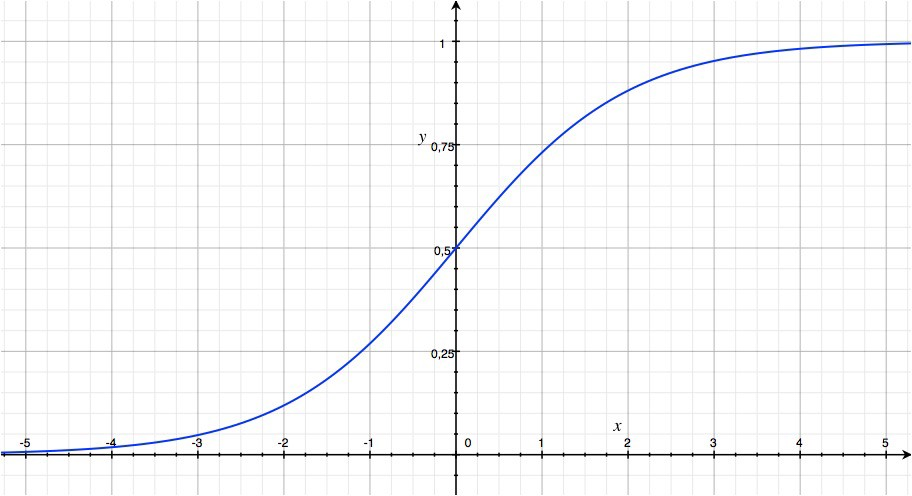

---

### Задача регрессии

Напомним, что в задаче регрессии мы хотим, чтобы наш алгоритм машинного обучения угадывал функцию распределения таргетного столбца и на основе этого делал предсказание действительной величины.

В случае если функция таргета имеет линейную зависимость, то для такой задачи отлично подойдет `линейная регрессия`.

#### Линейная регрессия

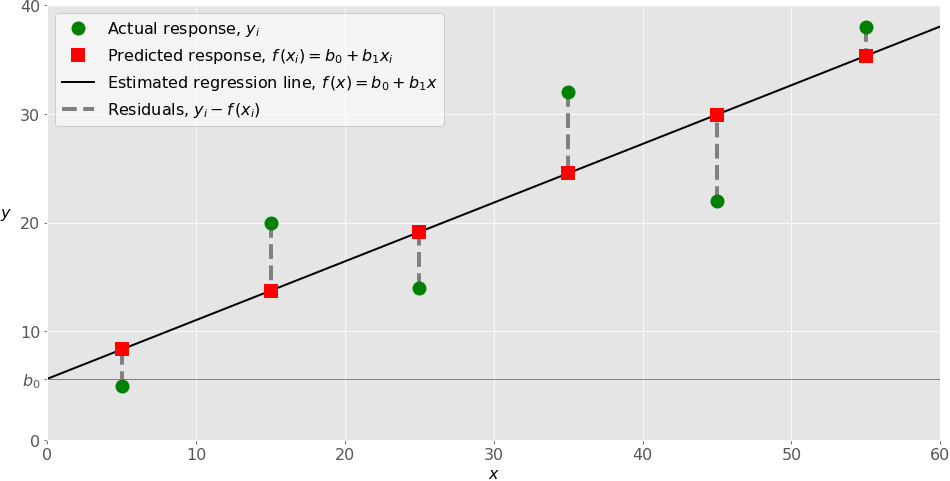

Напомним, что в задаче линейной регрессии мы хотим подобрать такую прямую, которая наилучшим образом описывает данные. Иными словами ближе всего проходит ко всем точкам выборки в совокупности.

Под «наилучшим»‎ можно понимать разные вещи, но в данном случае будем это понимать как то, что модель выдает предсказания, которые минимально отличаются от соответствующих им реальных значений.

Вспомним как выглядит уравнение линейной регрессии в общем случае:

$$a_{\mathbf{w}}(X) = X\mathbf{w}$$

Где $a_{\mathbf{w}}(⋅)$ -- алгоритм машинного обучения.

**NOTE:** внутри $\mathbf{w}$ мы учитываем свободной член $w_0$, кроме того, полагая, что дополнительно добавляется столбец единиц в матрице $X$.

Итого, мы хотим, чтобы наше предсказание $a_{\mathbf{w}}(X)$ и реальные значения таргета $y$ отличались минимально. Например мы можем смотреть различия с точки зрения суммы квадратов разности (ее еще называют второй нормой в квадрате и обозначают $\|⋅\|^2_2$) или отнормированной суммы квадратов разности.

Тогда с точки зрения математической оптимизации это записывается следующим образом:

$$\frac{1}{n}\|a_{\mathbf{w}}(X) - y\|^2_2 ⟶ \min_{\mathbf{w}} ⟺ \frac{1}{n}\|X\mathbf{w} - y\|^2_2 ⟶ \min_{\mathbf{w}}$$

Для удобства обозначим $Q(\mathbf{w}, X) = \frac{1}{n}\|a_{\mathbf{w}}(X) - y\|^2_2$ и будем называть функцией ошибки.

На самом деле в данном случае у нас теперь есть два пути -- решить это задачу при помощи знаний линейной алгебры и при помощи математической оптимизации.

- **Подход через линейную алгебру:**

    Заметим, что $\| X\mathbf{w} - y \|^2_2$ на самом деле просто многомерная парабола и ее минимум находится в точке, получающейся приравниванием к 0 выражения под квадратом.

    Иными словами, минимумом будет решение следующего уравнения: 
    $$y = X\mathbf{w}$$
    
    Однако мы уже знаем как решать такие системы уравнений. Ответом будет: 
    $$\mathbf{w}_{opt} = (X^TX)^{-1}X^Ty$$

- **Подход через математическую оптимизацию:**
    Первым делом вспомним, что у нас есть замечательные линейные методы оптимизации, но для них нам нужен посчитанный градиент функции.

    Как нам продифференцировать наше выражение? Тут к нам на помощь приходит матричное дифференцирование. Однако без вывода приведем градиент нашей функции:
    $$∇_{\mathbf{w}}Q(\mathbf{w}, X) = \frac{2}{n}X^T(X\mathbf{w} - y)$$

    Теперь у нас есть все, чтобы запустить градиентный спуск!

    $$\mathbf{w}^{new} = \mathbf{w}^{old} - \alpha ∇_{\mathbf{w}}Q(\mathbf{w^{old}}, X)$$

**Сейчас самое время задать вопрос: зачем нам нужно использовать градиентный спуск, если мы можем найти решение аналитически?**

Давайте вместе об этом подумаем! Какие могут быть проблемы у нахождения аналитического решения?

Перейдем от слов к практике и воспользуемся линейной регрессией из библиотеки `sklearn`, чтобы решить поставленную задачу.

In [13]:
# Импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

# Импортируем метрики качества MAPE и MSE
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [14]:
# Создаем модель линейной регрессии
model_lr = LinearRegression()

# Обучаем ее на тренировочной части датасета Diabetes
model_lr.fit(X_diabetes_train, y_diabetes_train)

LinearRegression()

In [15]:
# Посмотрим на качество работы нашего алгоритма на тестивых и тренировочных данных
y_diabetes_pred_train = model_lr.predict(X_diabetes_train)
y_diabetes_pred_test = model_lr.predict(X_diabetes_test)

print("MAPE")
print(f"Train: {mean_absolute_percentage_error(y_diabetes_train, y_diabetes_pred_train)}")
print(f"Test:  {mean_absolute_percentage_error(y_diabetes_test, y_diabetes_pred_test)}")
print("RMSE")
print(f"Train: {mean_squared_error(y_diabetes_train, y_diabetes_pred_train) ** 0.5}")
print(f"Test:  {mean_squared_error(y_diabetes_test, y_diabetes_pred_test) ** 0.5}")

MAPE
Train: 0.40271499375736075
Test:  0.3581480205026922
RMSE
Train: 53.48176898633742
Test:  54.034950681329846


В целом задача решена приемлимо, но вернемся к ней чуть ниже.

---

### Задача классификации

В задачи классификации мы хотим найти наилучную разделяющую поверхность, которая отделит элементы одного класса от элементов другого.

Однако зачастую два класса перемешаны между собой и тогда перед нами стоит задача найти такую поверхность, которая разбивает два класса минимально ошибаясь.

В этом семинаре нас будут интересовать только линейные классификаторы.

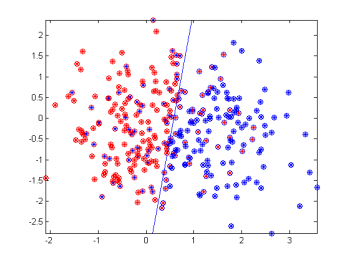

Предположим, что мы построили какую-то прямую. Однако как мы поймем какой класс находится с какой стороны от нее?

Для этого вспомним:
* Как задается плоскость в трехмерном случае -- общий вид плоскости Ax + By + Cz + D = 0 и при этом вектор $n = (A, B, C)$ называют вектором нормали, потому что он направлен перпендикулярно плоскости. В общем случае плоскость задается как $\sum w_i \cdot x_i + w_0$. То есть веса, которые мы должны подбирать -- это вектор нормали к нашей плоскости.
* Что такое скалярное произведение двух векторов -- $⟨a, b⟩ = \sum a_i \cdot b_i = |a|⋅|b|⋅\cos(\alpha)$ -- это величина больше 0, если вектора сонаправлены и меньше нуля в обратном случае.
* Каждая точка пространства признаков -- это радиус-вектор (вектор, соединяющий начало координат и точку пространства).

Но тогда получается, что знак скалярного произведения $⟨\mathbf{w}, x⟩$ будет больше нуля если точка $x$ лежит выше плоскости и меньше нуля, если лежит ниже нее. 

Для того, чтобы указать, что нас интересует только знак выражения, используют функцию $\mathbf{sign}(\cdot)$ 

Тогда получается, что линейный классификатор выглядит следующим образом: 
$$a_{\mathbf{w}}(x) = \mathbf{sign}(⟨x, \mathbf{w}⟩)$$

Кроме того не сложно понять чему будет равно расстояние между точкой и плоскостью:

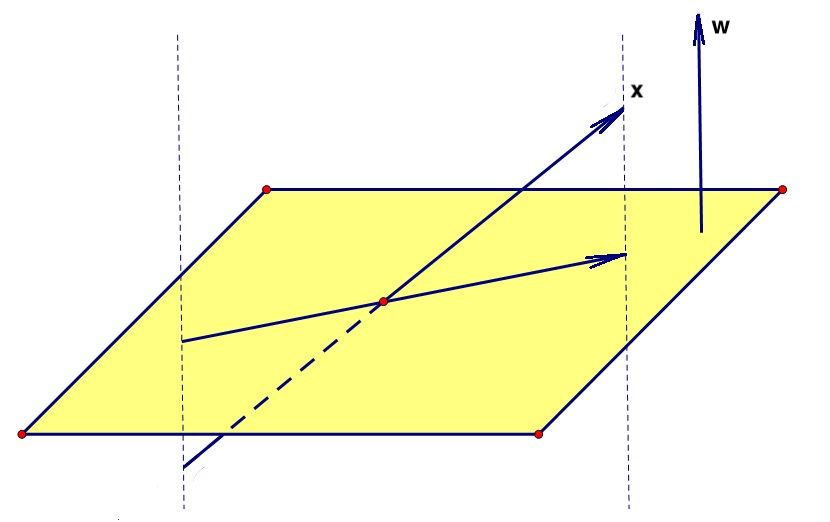

Расстояние от точки до плоскости равно:

$$\frac{⟨x, \mathbf{w}⟩}{\|\mathbf{w}\|}$$

**NOTE:** Удобно считать, что вектор нормали является нормированным и опускать деление на $\|\mathbf{w}\|$.

То есть чем дальше точка от плоскости в положительную сторону, тем больше значение скалярного произведения, а чем дальше точка от плоскости в отрицательную сторону, тем меньше значение скалярного произведения (по модулю растет).

**Выдвенем простое утверждение** -- *чем дальше точка от разделяющей плоскости, тем больше алгоритм уверен в том, что эта точка размечена правильно и наоборот. И если попытаться перевести это на язык теории вероятности, то чем дальше точка от разделяющей плоскости, тем вероятнее то, что точка размечена правильно.*

Тогда давайте воспользуемся функцие-сигмоидой!

Мы получим, что:
* чем дальше точка в положительном классе, тем больше значение $⟨x, \mathbf{w}⟩$, а значит тем ближе $\sigma(⟨x, \mathbf{w}⟩)$ к единице;
* чем дальше точка в отрицательном классе, тем меньше значение $⟨x, \mathbf{w}⟩$, а значит тем ближе $\sigma(⟨x, \mathbf{w}⟩)$ к нулю;
* если точка лежит на плоскости, то $\sigma(⟨x, \mathbf{w}⟩) = 0.5$.

Получается, что если вы будем брать сигмоду от выхода нашей модели, то сможем получить некоторую оценку вероятности того, что объект лежит в положительном классе.

Часто, чтобы посчитать вероятность принадлежности классу (без привязки к положительности класса или отрицательности) за вероятность принимают $\sigma(y⟨x, \mathbf{w}⟩)$, где $y$ -- реальный класс объекта $x$.

#### Логистическая регрессия

Логистическая регрессия решает проблему, с которой вы сталкивались в блоке по статистики -- она пытается подобрать параметры так, чтобы увеличить правдоподобие выборки.

**Recall:** Фу́нкция правдоподообия — это совместное распределение выборки из параметрического распределения, рассматриваемое как функция параметра. ($L(X | \mathbf{w}) = ∏\mathbf{P}(x_i | \mathbf{w})$)

Поскольку мы может оценить $\mathbf{P}(x_i | \mathbf{w})$ как $\sigma(y_i⟨x, \mathbf{w}⟩)$, то мы можем выписать правдоподобие нашего датасета при условии параметров нашей модели.

$$L(X | \mathbf{w}) = ∏\mathbf{P}(x_i | \mathbf{w}) = ∏\sigma(y_i⟨x_i, \mathbf{w}⟩) = ∏\frac{1}{1+\exp(-y_i⟨x_i, \mathbf{w}⟩)}$$

Удобнее работать с логарифмом правдоподобия:

$$\ln\left(L(X | \mathbf{w})\right) = ∑ \ln\left(\frac{1}{1+\exp(-y_i⟨x_i, \mathbf{w}⟩)}\right) = - ∑ \ln\left(1+\exp(-y_i⟨x_i, \mathbf{w}⟩)\right)$$

Мы хотим максимизировать функцию правдоподобия, тогда задача ставиться следующим образом:

$$∑ \ln\left(1+\exp(-y_i⟨x_i, \mathbf{w}⟩)\right) ⟶ \min_{\mathbf{w}}$$

Для того, чтобы решить эту задачу можно снова воспользоваться градиентным спуском. Для этого нужно посчитать градиент функции по $\mathbf{w}$.

Это хорошее упражнение, которое предоставляется слушателям!:)

In [16]:
# Импортируем логистическую регрессию
from sklearn.linear_model import LogisticRegression

# Импортируем метрики качества accuracy, precision и recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [17]:
# Создаем модель линейной регрессии
model_logr = LogisticRegression()

# Обучаем ее на тренировочной части датасета Iris
model_logr.fit(X_iris_train, y_iris_train)

LogisticRegression()

In [18]:
# Посмотрим на качество работы нашего алгоритма на тестивых и тренировочных данных
y_iris_pred_train = model_logr.predict(X_iris_train)
y_iris_pred_test = model_logr.predict(X_iris_test)

print("Accuracy")
print(f"Train: {accuracy_score(y_iris_train, y_iris_pred_train)}")
print(f"Test:  {accuracy_score(y_iris_test, y_iris_pred_test)}")
print("Precision")
print(f"Train: {precision_score(y_iris_train, y_iris_pred_train)}")
print(f"Test:  {precision_score(y_iris_test, y_iris_pred_test)}")
print("Recall")
print(f"Train: {recall_score(y_iris_train, y_iris_pred_train)}")
print(f"Test:  {recall_score(y_iris_test, y_iris_pred_test)}")

Accuracy
Train: 0.9571428571428572
Test:  0.9666666666666667
Precision
Train: 0.9705882352941176
Test:  0.9375
Recall
Train: 0.9428571428571428
Test:  1.0


In [19]:
model_logr.coef_, model_logr.intercept_

(array([[ 0.15118012,  0.65006814, -2.6038334 , -2.02615419]]),
 array([13.34923785]))

In [20]:
model_logr.classes_

array([0, 1])

Видим, что задача отлично решается линейным классификатором!

#### SVM

Еще один популярный линейный (условно) алгоритм -- это метод опорных векторов. Поговорим о нем не столь подробно, коснемся лишь основной идеи. Алгоритм пытается найти не просто идеально разделяющую поверхность, а такую поверхность, которая позволяет провести полосу наибольшей ширины, которая бы разделяла выборки. Иными словами строится такая гиперплоскость, которая находится как можно дальше от элементов выборки.

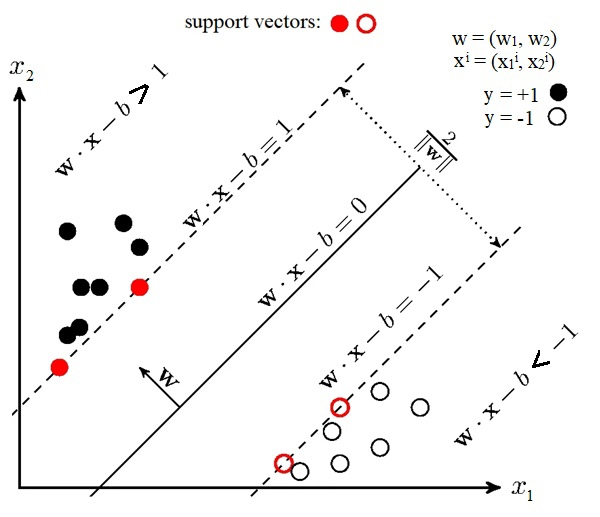

В случае если выборки невозможно линейно разделить, за каждый неверно помеченный элемент в полосе накладывается штраф, но идеая поиска полосы наибольшей ширины остается такой же.

Если выписать задачу svm, то она примет следующий вид:


$$\frac{1}{2}\|\mathbf{w}\|_2 + C\sum_i\max(0, 1 - y_i⟨X_i, \mathbf{w}⟩) ⟶ \min_{\mathbf{w}}$$

In [21]:
# Импортируем SVM
from sklearn.svm import SVC

# Импортируем метрики качества accuracy, precision и recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [22]:
# Создаем модель SVM
model_svm = SVC()

# Обучаем ее на тренировочной части датасета Iris
model_svm.fit(X_iris_train, y_iris_train)

SVC()

In [23]:
# Посмотрим на качество работы нашего алгоритма на тестивых и тренировочных данных
y_iris_pred_train = model_svm.predict(X_iris_train)
y_iris_pred_test = model_svm.predict(X_iris_test)

print("Accuracy")
print(f"Train: {accuracy_score(y_iris_train, y_iris_pred_train)}")
print(f"Test:  {accuracy_score(y_iris_test, y_iris_pred_test)}")
print("Precision")
print(f"Train: {precision_score(y_iris_train, y_iris_pred_train)}")
print(f"Test:  {precision_score(y_iris_test, y_iris_pred_test)}")
print("Recall")
print(f"Train: {recall_score(y_iris_train, y_iris_pred_train)}")
print(f"Test:  {recall_score(y_iris_test, y_iris_pred_test)}")

Accuracy
Train: 0.9285714285714286
Test:  0.9666666666666667
Precision
Train: 0.9166666666666666
Test:  0.9375
Recall
Train: 0.9428571428571428
Test:  1.0


---

### Ансамбли алгоритмов

Идея ансамблирования не нова. Использовать ответы нескольких алгоритмов и, затем, их аггрегировать интуитивна понятна, но как всегда все дело в мелочах.

В библиотеке `sklearn` есть реализация двух популярных методов ансамблирования -- `baggin` и `stacking`.

#### Bagging

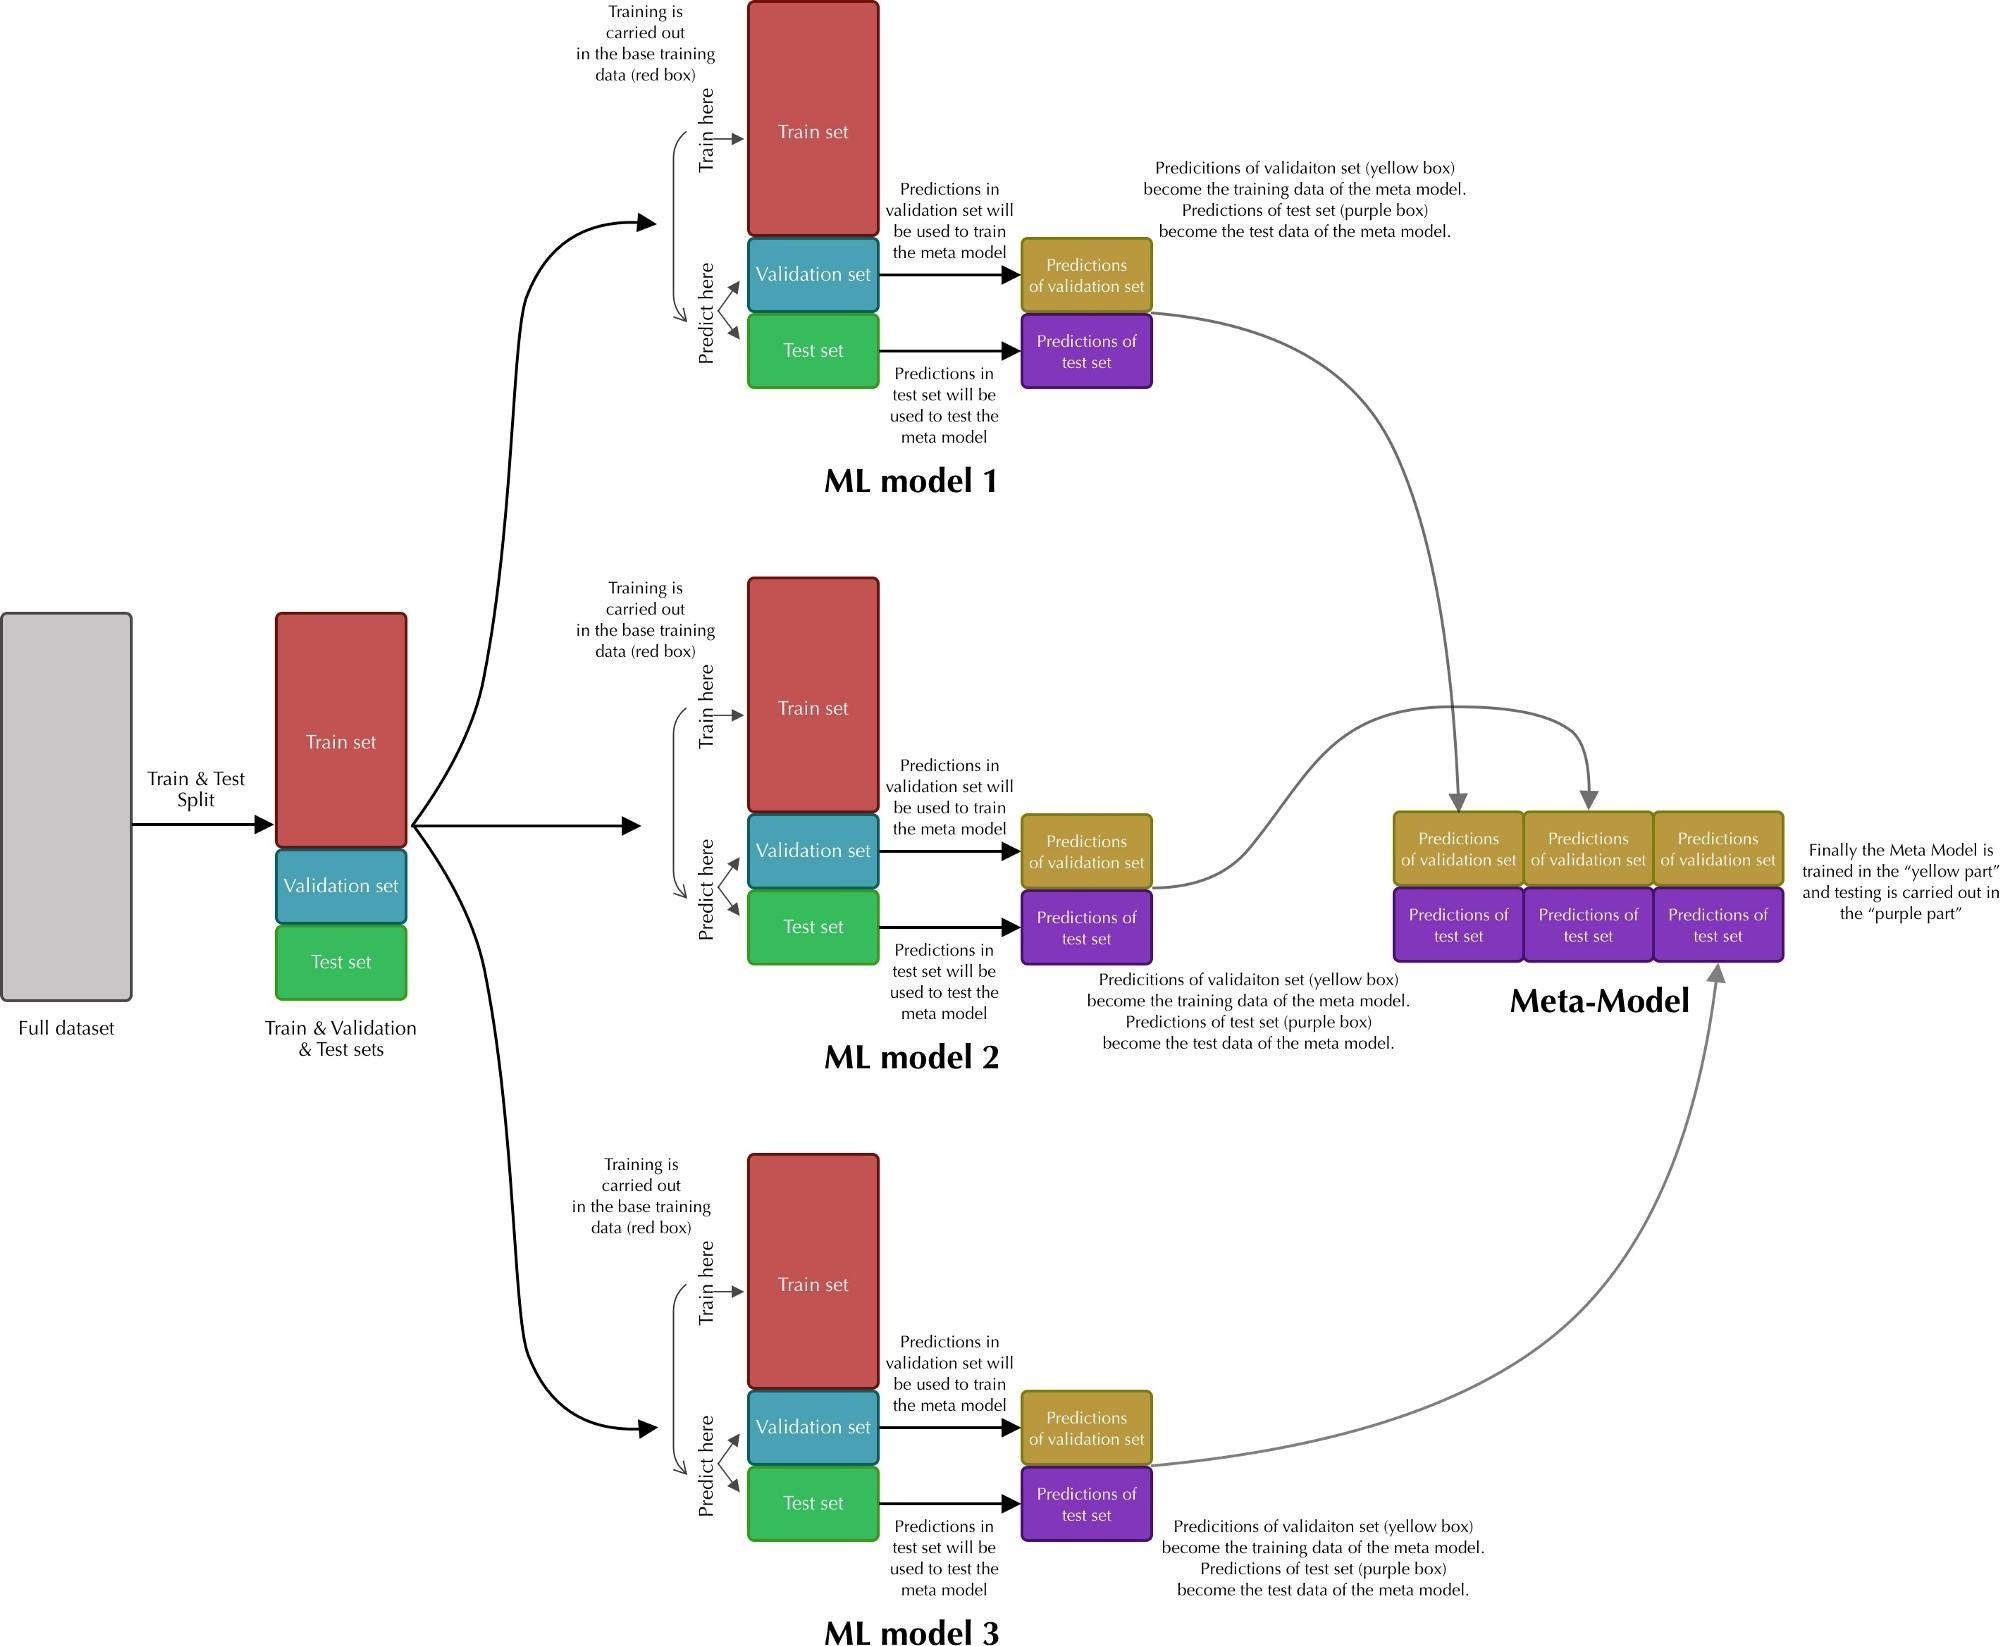

In [24]:
# Импортируем функцию бэггинга
from sklearn.ensemble import BaggingRegressor

In [25]:
# Создаем модель бэггинга с базовой моделью линейной регрессии и 5 моделями (n_estimators=5)
bagging_model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=5)

# Обучаем ее на тренировочной части датасета Diabetes
bagging_model.fit(X_diabetes_train, y_diabetes_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=LinearRegression(), n_estimators=5)

In [26]:
# Посмотрим на качество работы нашего алгоритма на тестивых и тренировочных данных
y_diabetes_pred_train = bagging_model.predict(X_diabetes_train)
y_diabetes_pred_test = bagging_model.predict(X_diabetes_test)

print("MAPE")
print(f"Train: {mean_absolute_percentage_error(y_diabetes_train, y_diabetes_pred_train)}")
print(f"Test:  {mean_absolute_percentage_error(y_diabetes_test, y_diabetes_pred_test)}")
print("RMSE")
print(f"Train: {mean_squared_error(y_diabetes_train, y_diabetes_pred_train) ** 0.5}")
print(f"Test:  {mean_squared_error(y_diabetes_test, y_diabetes_pred_test) ** 0.5}")

MAPE
Train: 0.4024744173232207
Test:  0.358417235059306
RMSE
Train: 53.60236432199984
Test:  54.25490990945836


In [ ]:
# Мы можем попытаться реализовать простейший bagging сами, используя, например, model_selection.cross_validate с return_estimator=True

Видим, что качество действительно немного выросло

#### Stacking

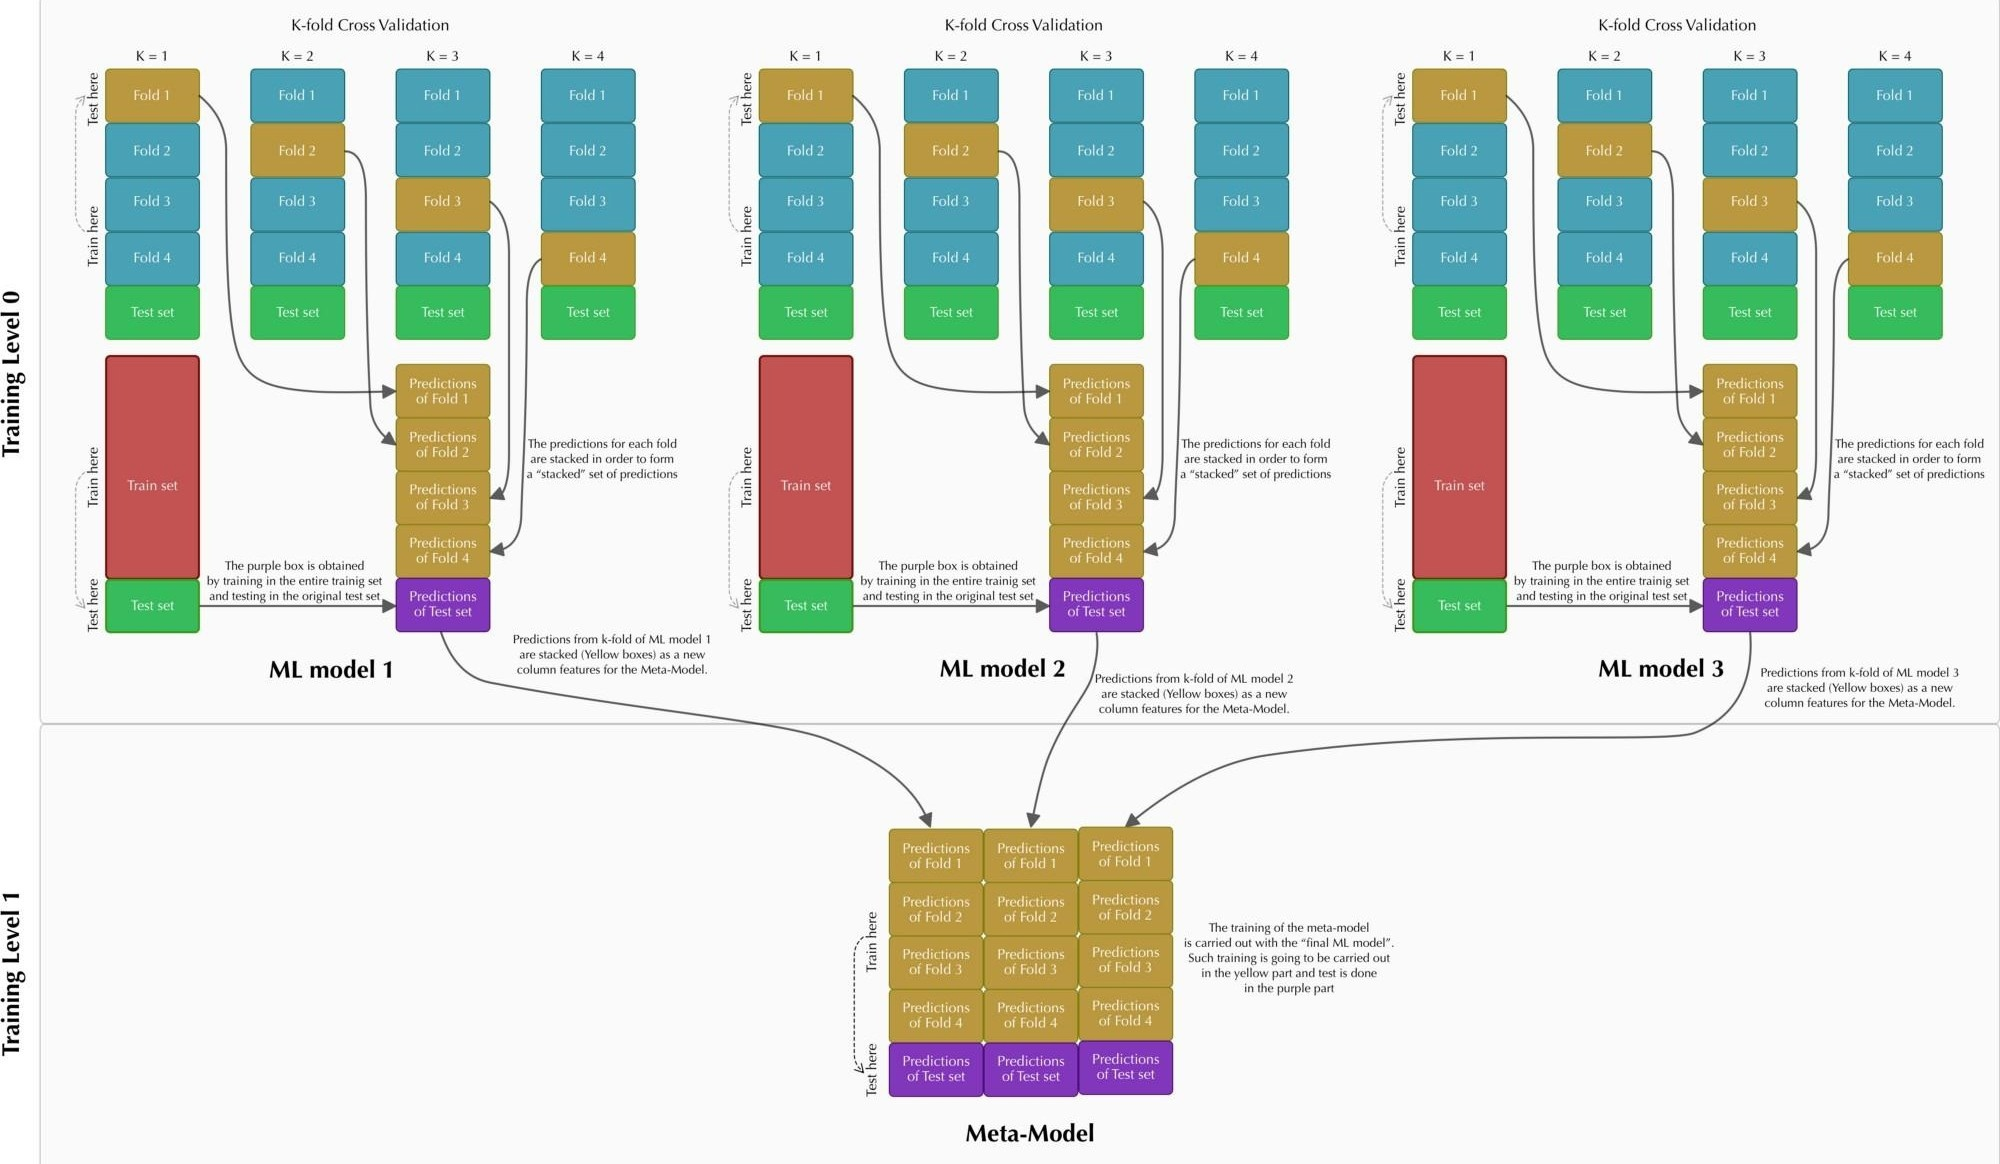

In [27]:
# Импортируем функцию стэкинга
from sklearn.ensemble import StackingClassifier
# Импортируем еще классификатор knn
from sklearn.neighbors import KNeighborsClassifier

In [28]:
?StackingClassifier

In [29]:
estimators = [
     ('LogReg', LogisticRegression()),
     ('SVM', SVC()),
     ("KNN", KNeighborsClassifier())
]

# Создаем модель стэкинга с моделями из estimators и финальной моделью логистической регрессией
stacking_model = StackingClassifier(estimators=estimators,
                                    final_estimator=LogisticRegression())

# Обучаем ее на тренировочной части датасета Iris
stacking_model.fit(X_iris_train, y_iris_train)

StackingClassifier(estimators=[('LogReg', LogisticRegression()), ('SVM', SVC()),
                               ('KNN', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [30]:
# Посмотрим на качество работы нашего алгоритма на тестивых и тренировочных данных
y_iris_pred_train = stacking_model.predict(X_iris_train)
y_iris_pred_test = stacking_model.predict(X_iris_test)

print("Accuracy")
print(f"Train: {accuracy_score(y_iris_train, y_iris_pred_train)}")
print(f"Test:  {accuracy_score(y_iris_test, y_iris_pred_test)}")
print("Precision")
print(f"Train: {precision_score(y_iris_train, y_iris_pred_train)}")
print(f"Test:  {precision_score(y_iris_test, y_iris_pred_test)}")
print("Recall")
print(f"Train: {recall_score(y_iris_train, y_iris_pred_train)}")
print(f"Test:  {recall_score(y_iris_test, y_iris_pred_test)}")

Accuracy
Train: 0.9571428571428572
Test:  0.9666666666666667
Precision
Train: 0.9705882352941176
Test:  1.0
Recall
Train: 0.9428571428571428
Test:  0.9333333333333333


In [ ]:
# Мы можем попытаться реализовать простейший stacking сами, используя наши обученные выше алгоритмы

Видим, что часть метрик изменилось. Для вычисления улучшения, необходимо провести дополнительные исследования.